The data here is taken form the Data Hackathon3.x - http://datahack.analyticsvidhya.com/contest/data-hackathon-3x

# Import Libraries:

In [64]:
import pandas as pd
import numpy as np
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
#from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
#from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
#from sklearn.metrics import accuracy_score, roc_auc_score, GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

# Data-Cleaning

The data has gone through following pre-processing:
1. City variable dropped because of too many categories
2. DOB converted to Age | DOB dropped
3. EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0 | EMI_Loan_Submitted dropped
4. EmployerName dropped because of too many categories
5. Existing_EMI imputed with 0 (median) - 111 values were missing
6. Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Interest_Rate dropped 
7. Lead_Creation_Date dropped because made little intuitive impact on outcome
8. Loan_Amount_Applied, Loan_Tenure_Applied imputed with missing
9. Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Loan_Amount_Submitted dropped 
10. Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Loan_Tenure_Submitted dropped 
11. LoggedIn, Salary_Account removed
12. Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Processing_Fee dropped
13. Source - top 2 kept as is and all others combined into different category
14. Numerical and One-Hot-Coding performed

In [3]:
#Load data:
train = pd.read_csv('Train_nyOWmfK.csv',encoding = "ISO-8859-1")
test = pd.read_csv('Test_bCtAN1w.csv',encoding = "ISO-8859-1")

## Check data

In [4]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [5]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [6]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [7]:
train['source'] = 'train' # add a column 'source' into train dataset, which value is 'train'
test['source']='test'
df=pd.concat([train, test],ignore_index=True)
df.shape

(124737, 27)

## Check missing data

In [10]:
df.isnull().sum() # same as df.apply(lambda x: x.isnull().sum()): all missing data for each column

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [11]:
df.isnull().sum().sum() # The number of all missing data of the df

448300

## Check all categorical data

In [13]:
df.columns

Index(['City', 'DOB', 'Device_Type', 'Disbursed', 'EMI_Loan_Submitted',
       'Employer_Name', 'Existing_EMI', 'Filled_Form', 'Gender', 'ID',
       'Interest_Rate', 'Lead_Creation_Date', 'Loan_Amount_Applied',
       'Loan_Amount_Submitted', 'Loan_Tenure_Applied', 'Loan_Tenure_Submitted',
       'LoggedIn', 'Mobile_Verified', 'Monthly_Income', 'Processing_Fee',
       'Salary_Account', 'Source', 'Var1', 'Var2', 'Var4', 'Var5', 'source'],
      dtype='object')

In [17]:
df.dtypes.City, df.dtypes.Interest_Rate

(dtype('O'), dtype('float64'))

In [21]:
df.select_dtypes(include=['object']).columns

Index(['City', 'DOB', 'Device_Type', 'Employer_Name', 'Filled_Form', 'Gender',
       'ID', 'Lead_Creation_Date', 'Mobile_Verified', 'Salary_Account',
       'Source', 'Var1', 'Var2', 'source'],
      dtype='object')

In [24]:
catvar = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in catvar:
    print('\nFrequency count for variable {}'.format(v))
    print(df[v].value_counts())


Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corp

## Handling individual variables

### City

In [25]:
len(df.City.unique())

724

In [26]:
#drop city because too many unique
df.drop('City',axis=1,inplace=True)

### DOB

In [27]:
df.DOB.head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [28]:
int('23-May-78'[-2:])

78

In [29]:
df['Age']=df.DOB.apply(lambda x: 117-int(x[-2:]))
df.Age.head()

0    39
1    32
2    36
3    30
4    33
Name: Age, dtype: int64

In [30]:
df.drop('DOB', axis=1, inplace=True)

### EMI_Load_Submitted

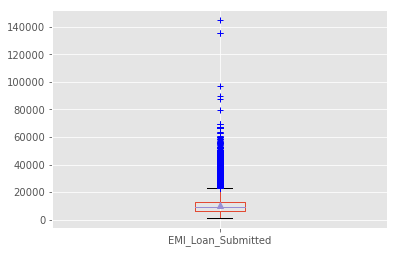

In [35]:
df.boxplot(column=['EMI_Loan_Submitted'], return_type='axes', sym='b+', showmeans=True)
plt.show()

In [36]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
df['EMI_Loan_Submitted_Missing'] = df['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
df[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [37]:
#drop original vaiables:
df.drop('EMI_Loan_Submitted',axis=1,inplace=True)

### Employer Name

In [38]:
len(df['Employer_Name'].value_counts())

57193

In [39]:
#I'll drop the variable because too many unique values. Another option could be to categorize them manually
df.drop('Employer_Name',axis=1,inplace=True)

### Existing_EMI

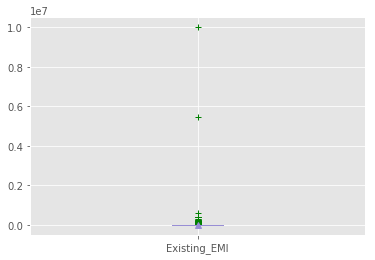

In [46]:
df.boxplot(column='Existing_EMI',return_type='axes', sym='g+', showmeans=True) # showfliers=False
plt.show()

In [48]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.Existing_EMI.describe()

count     124626.00000
mean        3636.34249
std        33691.24004
min            0.00000
25%            0.00000
50%            0.00000
75%         3500.00000
max     10000000.00000
Name: Existing_EMI, dtype: float64

In [49]:
#Impute by median (0) because just 111 missing:
df.Existing_EMI.fillna(0, inplace=True)

### Interest Rate

In [50]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
df['Interest_Rate_Missing'] = df['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
df[['Interest_Rate','Interest_Rate_Missing']].head(10)

,Interest_Rate,Interest_Rate_Missing
0,nan,1
1,13.25000,0
2,nan,1
3,nan,1
4,nan,1
5,13.99000,0
6,nan,1
7,nan,1
8,14.85000,0
9,18.25000,0


In [51]:
df.drop('Interest_Rate', axis=1, inplace=True)

### Lead Creation Date

In [53]:
#Drop this variable because doesn't appear to affect much intuitively
df.drop('Lead_Creation_Date',axis=1,inplace=True)

### Loan Amount and Tenure applied

In [54]:
#Impute with median because only 111 missing:
df['Loan_Amount_Applied'].fillna(df['Loan_Amount_Applied'].median(),inplace=True)
df['Loan_Tenure_Applied'].fillna(df['Loan_Tenure_Applied'].median(),inplace=True)

### Loan Amount and Tenure selected

In [55]:
#High proportion missing so create a new var whether present or not
df['Loan_Amount_Submitted_Missing'] = df['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
df['Loan_Tenure_Submitted_Missing'] = df['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [56]:
#Remove old vars
df.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

### Remove logged-in

In [57]:
df.drop('LoggedIn',axis=1,inplace=True)

### Remove Salary account

In [58]:
#Salary account has mnay banks which have to be manually grouped
df.drop('Salary_Account',axis=1,inplace=True)

### Processing_Fee

In [59]:
#High proportion missing so create a new var whether present or not
df['Processing_Fee_Missing'] = df['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
df.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [60]:
df['Source'] = df['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
df['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

### Final Data

In [61]:
df.isnull().sum() # df.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [62]:
df.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [63]:
df.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,Web-browser,0.00000,0.00000,N,Female,ID000002C20,300000.00000,5.00000,N,20000,...,G,1,0,train,39,1,1,1,1,1
1,Web-browser,0.00000,0.00000,N,Male,ID000004E40,200000.00000,2.00000,Y,35000,...,G,3,13,train,32,0,0,0,0,1
2,Web-browser,0.00000,0.00000,N,Male,ID000007H20,600000.00000,4.00000,Y,22500,...,B,1,0,train,36,1,1,0,0,1
3,Web-browser,0.00000,0.00000,N,Male,ID000008I30,1000000.00000,5.00000,Y,35000,...,B,3,10,train,30,1,1,0,0,1
4,Web-browser,0.00000,25000.00000,N,Male,ID000009J40,500000.00000,2.00000,Y,100000,...,B,3,17,train,33,1,1,0,0,1


## Numerical Coding

In [65]:
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    df[col] = le.fit_transform(df[col])

In [66]:
df[var_to_encode].head()

,Device_Type,Filled_Form,Gender,Var1,Var2,Mobile_Verified,Source
0,1,0,0,13,6,0,0
1,1,0,1,8,6,1,0
2,1,0,1,13,1,1,2
3,1,0,1,13,1,1,2
4,1,0,1,13,1,1,2


## One-Hot Coding

In [67]:
df = pd.get_dummies(df, columns=var_to_encode)
df.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [68]:
df.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,source,Age,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.00000,0.00000,ID000002C20,300000.00000,5.00000,20000,1,0,train,39,...,0,0,0,0,1,1,0,1,0,0
1,0.00000,0.00000,ID000004E40,200000.00000,2.00000,35000,3,13,train,32,...,0,0,0,0,1,0,1,1,0,0
2,0.00000,0.00000,ID000007H20,600000.00000,4.00000,22500,1,0,train,36,...,0,0,0,0,0,0,1,0,0,1
3,0.00000,0.00000,ID000008I30,1000000.00000,5.00000,35000,3,10,train,30,...,0,0,0,0,0,0,1,0,0,1
4,0.00000,25000.00000,ID000009J40,500000.00000,2.00000,100000,3,17,train,33,...,0,0,0,0,0,0,1,0,0,1


## Separate the train and test sets

In [69]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [70]:
train.drop('source',axis=1,inplace=True)
test.drop('source',axis=1,inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Write Out the train/test data

In [71]:
train.to_csv('train_Hackathon.csv',index=False)
test.to_csv('test_Hackathon.csv',index=False)